# Data reading & first glance

In [1]:
import pandas as pd

url = "https://drive.google.com/file/d/1z1Zcpx1FpHokhSwmGSd7-hk9O_tdcKqW/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'Expensive'],
      dtype='object')

In [2]:
y= data.pop('Expensive')
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [3]:
X= data.copy()

# Train-test split

Before exploring the data, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize.

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state= 1994)

In [ ]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
707,6240,48.0,1324,2,1,0,2,192,0
108,8500,85.0,793,3,0,0,0,0,0
162,12182,95.0,1541,3,1,0,2,0,0
3,9550,60.0,756,3,1,0,3,0,0
292,11409,60.0,768,3,1,0,1,0,160


In [ ]:
y_train.head()

,Expensive
707,1
108,0
162,0
3,0
292,0


# Data Exploration

In [ ]:
train_set= X_train.copy()

In [ ]:
train_set['Expensive']= y_train
train_set.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
707,6240,48.0,1324,2,1,0,2,192,0,1
108,8500,85.0,793,3,0,0,0,0,0,0
162,12182,95.0,1541,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
292,11409,60.0,768,3,1,0,1,0,160,0


In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 707 to 438
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   962 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
 9   Expensive     1168 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 100.4 KB


In [ ]:
train_set.isna().sum()

,0
LotArea,0
LotFrontage,206
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0
Expensive,0


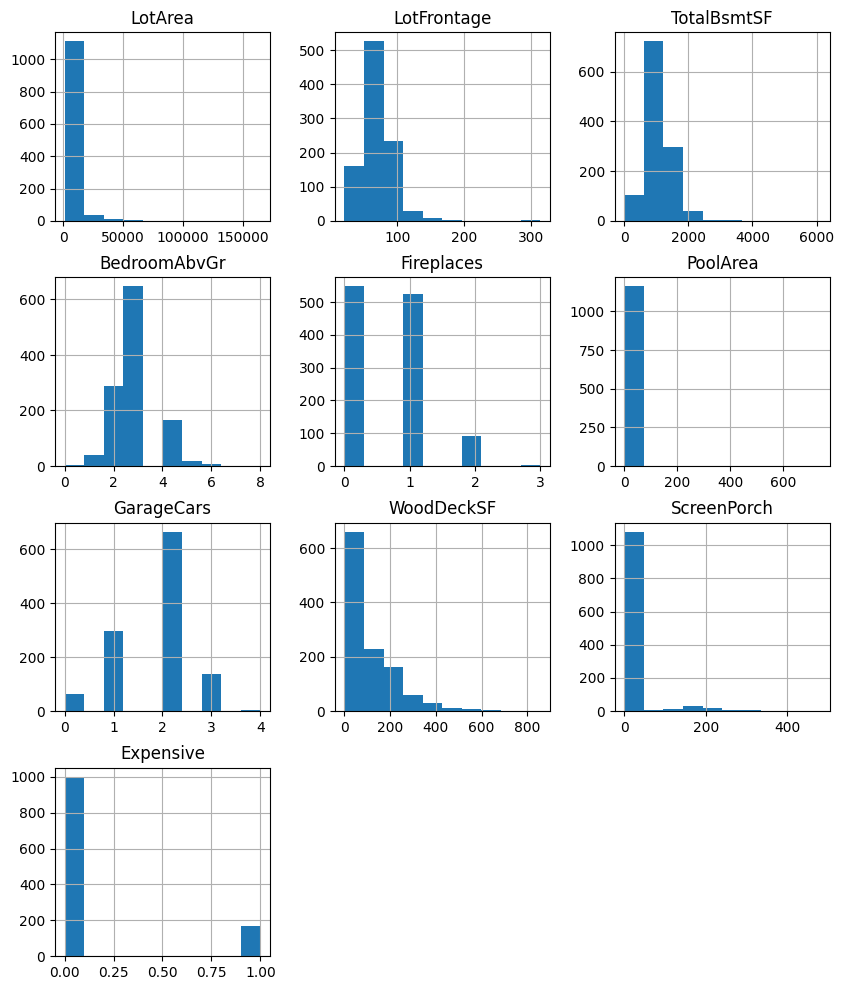

In [ ]:
train_set.hist(figsize= (10,12));

In [ ]:
#For summary statistics
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 98.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=2b8b69c9b7af04f3e090fe1e3d106191ba9d2083bd20487b4792dd8176f0c06a
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
ProfileReport(train_set)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
print("Before:", train_set.shape)
train_set = train_set.drop_duplicates()
print("After:", train_set.shape)

Before: (1168, 10)
After: (1158, 10)


# 1.&nbsp;Creating & Testing Models

##1.1&nbsp;Dummy Model


In [ ]:
y_train.value_counts()

,count
Expensive,
0,1000
1,168


In [ ]:
len(y_train)

1168

In [ ]:
#Our predictions for the train set will be just 1168 zeros:

dummy_train_pred= pd.Series(0, index= range(len(y_train)))

In [ ]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                y_pred = dummy_train_pred
                                )

round(train_accuracy, 2)

0.86

Now let's see our model on test set.


In [ ]:
dummy_test_pred= pd.Series(0, index= range(len(y_test)))

In [ ]:
test_accuracy= accuracy_score(y_true= y_test,
                              y_pred= dummy_test_pred)
round(test_accuracy,2)

0.83

The performance is pretty much the same. This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a **low variance**, which is good. This means the patterns it captures are population-wide patterns that aren't dependent on which observations are randomly sampled from that population. <br>However, low variance often comes at the cost of **high bias**. Bias means systematic mistakes in the models predictions. Patterns in the model's mistakes are equivalent to predictive patterns the model has missed by being too simple.<br> The more complex we make our model, the more nuanced of patterns it can detect, lowering the bias; but this often results in the model capturing patterns in the particular sample it was fit to that don't generalize to the whole population (what we call "**noise**") which increases the variance. This problem is the central dilemma of supervised machine learning and it goes by the name of **"The Bias-Variance Tradeoff"**

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is **underfitting**.


Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

##1.2&nbsp;Intuition-based Model

In [ ]:
def intuition_based_model(X):
  # Initially predict all houses are in-expensive
  X['Expensive'] = 0
  # Come up with conditions that you think made houses expensive
  condition1 = X['Fireplaces'] > 0
  condition2 = X['GarageCars'] > 1
  expensive_filter = condition1 & condition2 # could also have "or" conditions
  # Change prediction to Expensive for just those houses
  X.loc[expensive_filter, 'Expensive'] = 1
  # Pop and return the predictions
  preds = X.pop('Expensive')
  return preds

In [ ]:
# Call the function to get predictions
preds_train = intuition_based_model(X_train.copy())

In [ ]:
accuracy_score(y_true= y_train,
               y_pred= preds_train)

0.6934931506849316

In [ ]:
preds_test= intuition_based_model(X_test.copy())

In [ ]:
accuracy_score(y_true= y_test,
               y_pred= preds_test)

0.726027397260274

# 2.&nbsp;Decision Trees

In [ ]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

The model cannot deal with categorical features.In case if we have any, then our approach should always be to quickly complete the task  first, and iterate to improve it later. Simply start by dropping the categorical features. **X_num = X.select_dtypes(include="number")** using this select only numeric columns and since we created a new dataframe without the categorical features, we need to create our test and train sets again and then implement desicion tree.

The code will also throw an error when dataset have missing values in
it, because most models cannot handle missing values in the dataset. Sklearn has since updated its decision tree to be able to automatically handle missing values, but most other models would return an error. Lets look at what happens when we try to fit a different model, KNN.

In [ ]:
# import
from sklearn.neighbors import KNeighborsClassifier
# initialize
model = KNeighborsClassifier()
# fit
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Dealing with MissingValues

In [ ]:
X_train.isna().sum()

,0
LotArea,0
LotFrontage,206
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0


In [ ]:
from sklearn.impute import SimpleImputer

Approach for different types of estimators:
1. initialize,
2. use fit on the **train** set,
3. use transform on the **train** set,
4. use transform on the **test** set.

In [ ]:
from sklearn import set_config
# this code will make it so that whenever we transform data the output is a data frame
set_config(transform_output='pandas')

In [ ]:
# 1. initialize
my_imputer = SimpleImputer()

# 2. use fit on the train set
my_imputer.fit(X_train)

# 3. use transform on the train set
X_imputed_train = my_imputer.transform(X_train)

In [ ]:
X_imputed_train.isnull().sum()

,0
LotArea,0
LotFrontage,0
TotalBsmtSF,0
BedroomAbvGr,0
Fireplaces,0
PoolArea,0
GarageCars,0
WoodDeckSF,0
ScreenPorch,0


## Implement a Decision Tree (numerical features + missing values imputed)

In [ ]:
# Initialize and fit the modeö to the train data again (give some parameters)
my_tree = DecisionTreeClassifier()

my_tree.fit(X = X_imputed_train,
            y = y_train)

DecisionTreeClassifier()

## Make predictions and check accuracy on the Train set

In [ ]:
y_pred_tree_train = my_tree.predict(X_imputed_train)

**.predict() method**: you pass in the input data (X_num_imputed_train) for which you want to predict the target variable (or class labels).

In [ ]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train
              )

1.0

## Check accuracy for the Test set

### Transform the test set

In [ ]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

### Make predictions on the test set

In [ ]:
y_pred_tree_test = my_tree.predict(X_imputed_test)

### Check accuracy

In [ ]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test
              )

0.8698630136986302

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

Need to improve the model.

## Plotting the Decision Tree

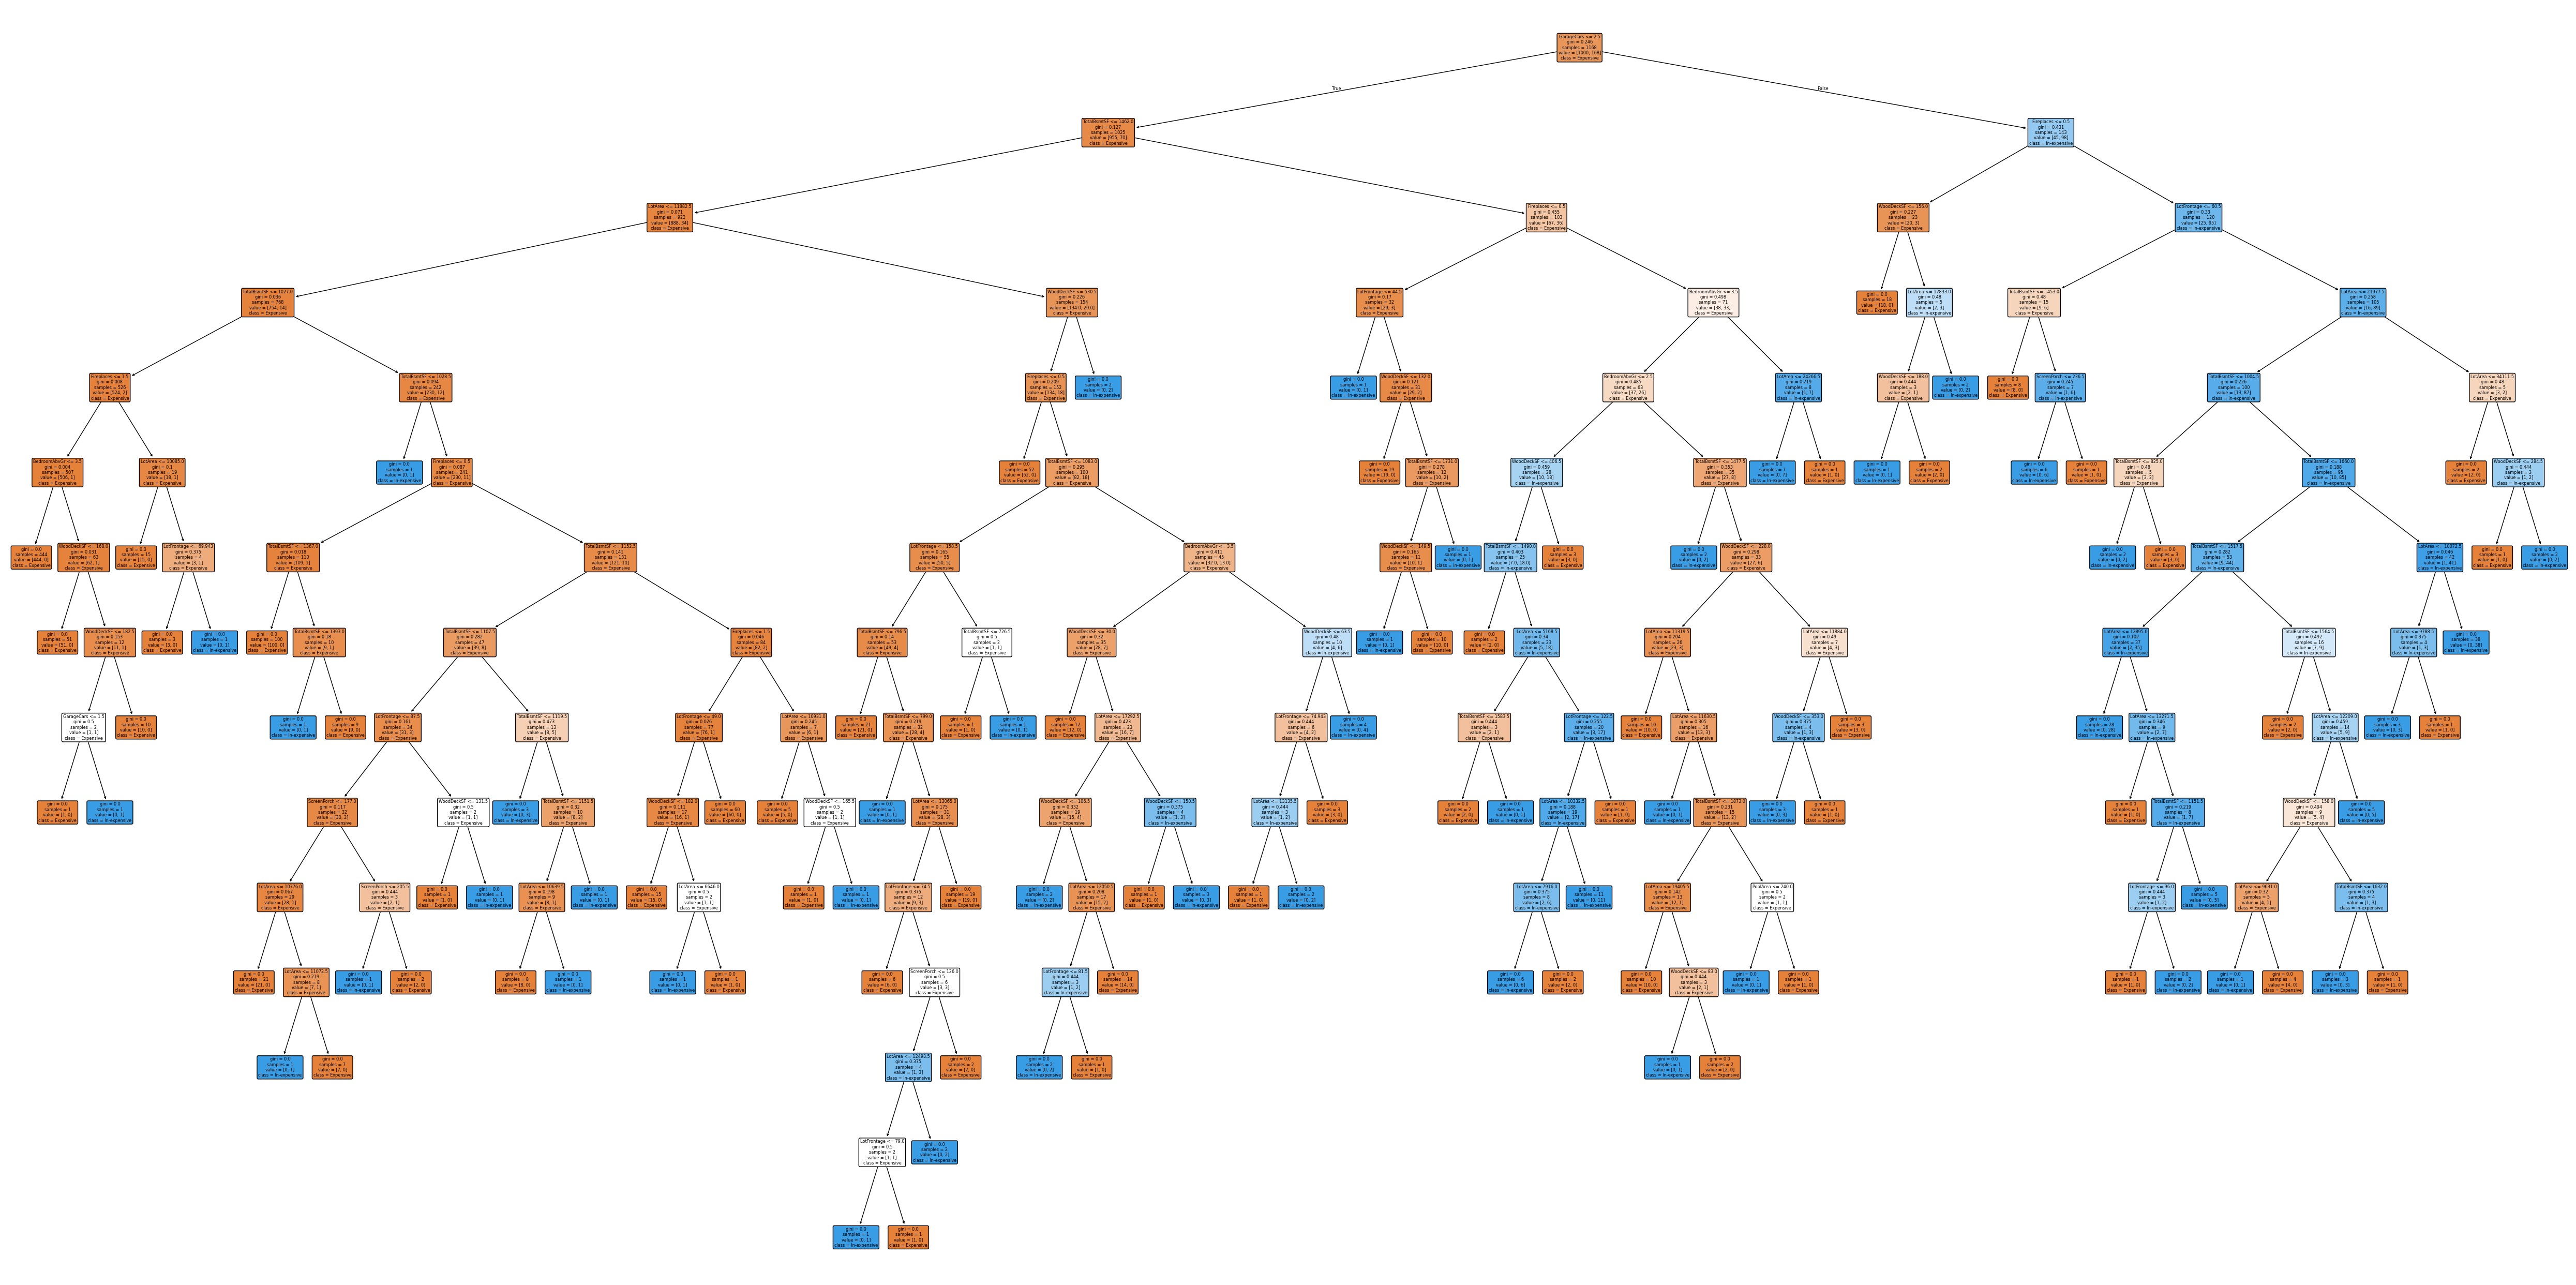

In [ ]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
    my_tree,                          # Decision tree model to visualize
    filled=True,                      # Whether to fill nodes with colors based on majority class
    rounded=True,                     # Whether to round the corners of the nodes
    class_names=['Expensive','In-expensive'],  # Names of the classes for the target variable
    feature_names=X.columns       # Names of the features (columns) in your dataset
);

Current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

##&nbsp; Puring the tree

Major Hyperparameters:

- `max_depth`: Limits how many follow-up questions the tree can ask. The more questions we ask, the more specific the groups are that we are making predictions with (the leaf nodes) which makes them less likely to represent general, population-wide patterns. Lower numbers will prevent overfitting but may lead to underfitting. A range of **2-15** is reasonable depending on the complexity of the problem and the number of features in the dataset. It can be much larger though if the problem is highly complex and we have a lot of training data.
- `min_samples_leaf`: Limits how small the leaf nodes can be. Remember that the algorithm is finding groups of training data that all (or mostly) have the same class so it can make predictions based on which group a new observation falls in. `min_samples_leaf` sets a limit on how small those groups can be. Higher numbers require to model to predict based on larger groups and can reduce overfitting. We can provide a specific number of observations with an integer or a proportion of the dataset with a float, which can be helpful if we are fitting the model to differently sized datasets at various points in the process (tomorrow you will see when and why we do this). The right number depends on the complexity of the problem, more complex problems requiring smaller groups/leaves, but a range between 0.01 and 0.1 is a good place to start.<br>

In [ ]:
my_crippled_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

In [ ]:
my_crippled_tree.fit(X = X_imputed_train,
                     y = y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20)

Let's evaluate my crippled tree

In [ ]:
predictions_tr = my_crippled_tree.predict(X_imputed_train)

In [ ]:
accuracy_score(y_true=y_train,y_pred=predictions_tr)

0.916095890410959

In [ ]:
predictions_ts = my_crippled_tree.predict(X_imputed_test)
accuracy_score(y_true=y_test, y_pred=predictions_ts)

0.910958904109589

# 3.&nbsp; Pipeline creation

In [ ]:
from sklearn.pipeline import make_pipeline

## 3.1 Initialize transformer and model

In [ ]:
imputer= SimpleImputer(strategy= 'mean')
dtree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, random_state= 1234)

## 3.2 Create a pipeline

In [ ]:
pipe= make_pipeline(imputer, dtree)

In [ ]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=1234))])

## 3.3 Fit the pipeline to the training data

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=1234))])

In [ ]:
#Pipe steps presented like text:

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=1234))])

In [ ]:
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=10,
                                        random_state=1234))])

## 3.4&nbsp;Use the pipeline to make predictions

In [ ]:
prediction= pipe.predict(X_test);

Object `pipe` can take (almost) raw data as input and output predictions. No longer need to impute missing values and use the model to make predictions in separate steps.

In [ ]:
accuracy_score(y_true= y_test,
               y_pred= prediction)

0.9691780821917808

# 4.&nbsp;Trying to find the best max_depth and min_samples_leaf

## 4.1 Max_Depth

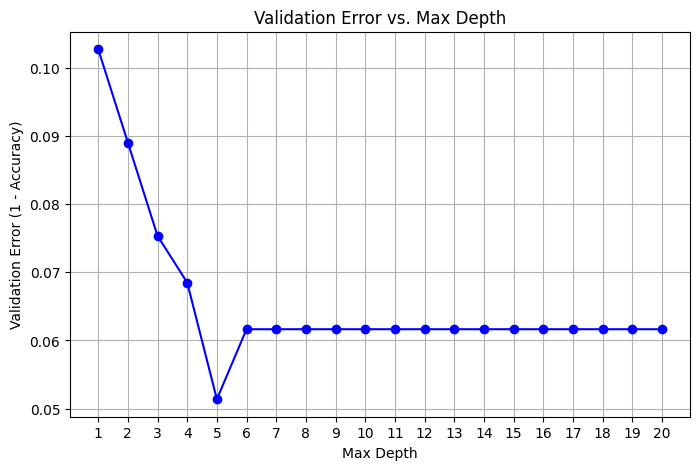

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

depths = range(1, 21)
errors = []

for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=10, random_state=1234)
    pipe = make_pipeline(SimpleImputer(strategy='mean'), dtree)
    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

plt.figure(figsize=(8, 5))
plt.plot(depths, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Max Depth")
plt.ylabel("Validation Error (1 - Accuracy)")
plt.title("Validation Error vs. Max Depth")
plt.grid(True)
plt.xticks(depths)
plt.show()


## 4.2 Min_Sample_Leaf

In [ ]:
leaf_values = [1, 2, 5, 10, 20, 50]
val_scores = []

for leaf in leaf_values:
    pipe = make_pipeline(
        SimpleImputer(strategy='mean'),
        DecisionTreeClassifier(max_depth=5, min_samples_leaf=leaf, random_state=1234)
    )
    pipe.fit(X_train, y_train)
    score = accuracy_score(y_test, pipe.predict(X_test))
    val_scores.append(score)

for leaf, score in zip(leaf_values, val_scores):
    print(f"min_samples_leaf = {leaf}: Accuracy = {score}")


min_samples_leaf = 1: Accuracy = 0.9486301369863014
min_samples_leaf = 2: Accuracy = 0.9452054794520548
min_samples_leaf = 5: Accuracy = 0.9452054794520548
min_samples_leaf = 10: Accuracy = 0.9486301369863014
min_samples_leaf = 20: Accuracy = 0.9246575342465754
min_samples_leaf = 50: Accuracy = 0.8972602739726028


# 5.&nbsp; Looking into data

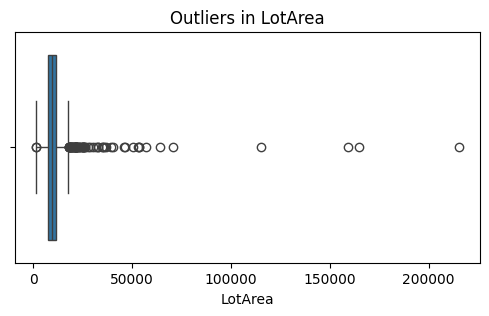

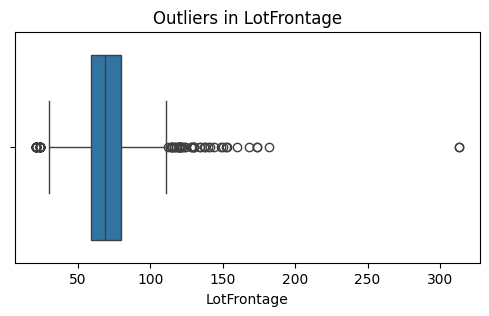

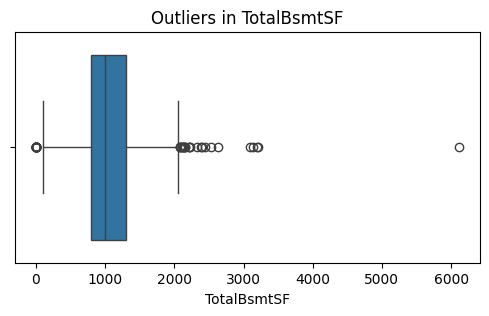

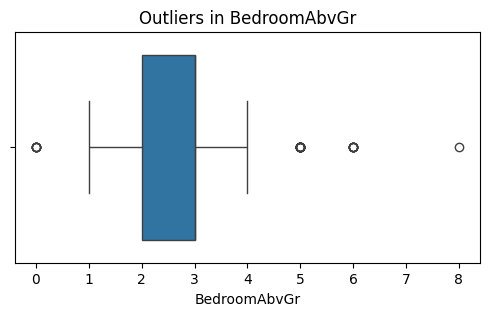

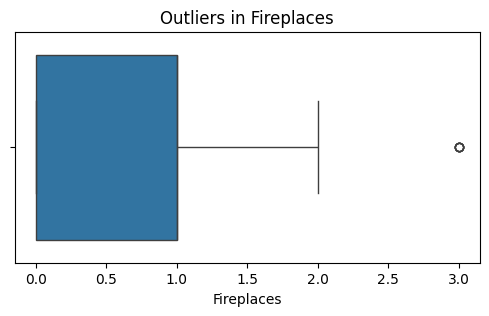

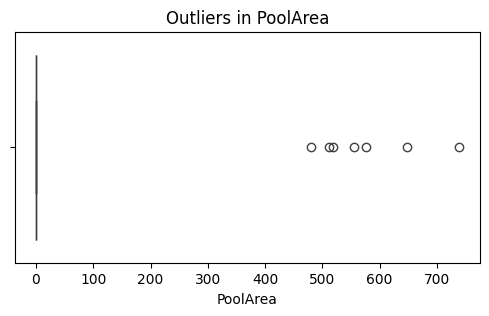

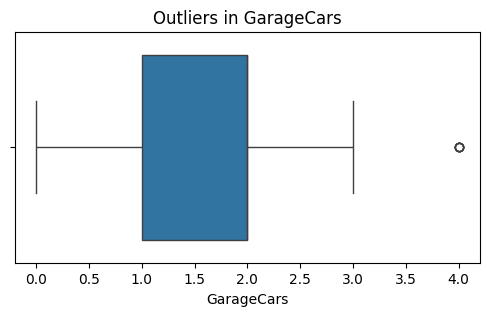

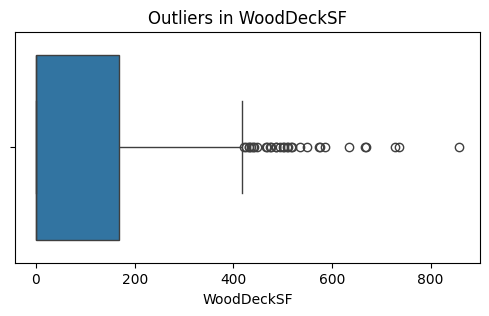

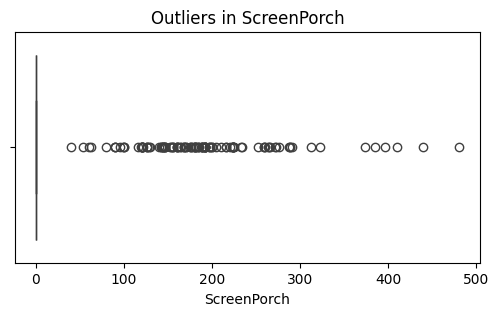

In [ ]:
import seaborn as sns
for col in data.select_dtypes(include='number').columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
    plt.show()

In [ ]:
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(data.select_dtypes(include='number')))
outlier_counts = (z_scores > 3).sum(axis=0)
print("Outliers per column (z > 3):")
print(outlier_counts)

Outliers per column (z > 3):
[13  0 10 14  5  7  0 22 55]


In [ ]:
data.select_dtypes(include='number').skew().sort_values(ascending=False)

,0
PoolArea,14.828374
LotArea,12.207688
ScreenPorch,4.122214
LotFrontage,2.163569
WoodDeckSF,1.541376
TotalBsmtSF,1.524255
Fireplaces,0.649565
BedroomAbvGr,0.211790
GarageCars,-0.342549


Skew > 1 or < -1 → Highly skewed → use median imputation

Skew ≈ 0 → Symmetric → mean imputation is fine



## 5.1&nbsp; Creating Model again

In [ ]:
from sklearn.compose import ColumnTransformer
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state= 1994)

median_cols = ['PoolArea', 'LotArea', 'ScreenPorch', 'LotFrontage', 'WoodDeckSF', 'TotalBsmtSF', 'Fireplaces']
mean_cols = ['BedroomAbvGr', 'GarageCars']

preprocessor = ColumnTransformer(transformers=[
    ('median_imputer', SimpleImputer(strategy='median'), median_cols),
    ('mean_imputer', SimpleImputer(strategy='mean'), mean_cols)
])

pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1234))


In [ ]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['PoolArea', 'LotArea',
                                                   'ScreenPorch', 'LotFrontage',
                                                   'WoodDeckSF', 'TotalBsmtSF',
                                                   'Fireplaces']),
                                                 ('mean_imputer',
                                                  SimpleImputer(),
                                                  ['BedroomAbvGr',
                                                   'GarageCars'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        random_state=1234))])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['PoolArea', 'LotArea',
                                                   'ScreenPorch', 'LotFrontage',
                                                   'WoodDeckSF', 'TotalBsmtSF',
                                                   'Fireplaces']),
                                                 ('mean_imputer',
                                                  SimpleImputer(),
                                                  ['BedroomAbvGr',
                                                   'GarageCars'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        random_state=1234))])

In [ ]:
pred_train= pipe.predict(X_train)

In [ ]:
accuracy_score(y_true= y_train,
               y_pred= pred_train)

0.928082191780822

In [ ]:
pred_test= pipe.predict(X_test)

In [ ]:
accuracy_score(y_true= y_test,
               y_pred= pred_test)

0.9143835616438356

## Checking the importance of columns & recreate model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importance)


TotalBsmtSF     0.256677
GarageCars      0.229864
LotArea         0.141907
LotFrontage     0.125585
WoodDeckSF      0.100654
Fireplaces      0.081449
BedroomAbvGr    0.040408
ScreenPorch     0.019862
PoolArea        0.003594
dtype: float64


In [ ]:
feature_importance_text = """
Feature         | Importance | Interpretation
--------------- | ---------- | ---------------------------------------------------------------
TotalBsmtSF     | 0.2567     | Most influential feature — a strong predictor. Bigger basements likely indicate higher value homes.
GarageCars      | 0.2299     | Very important — number of cars garage holds relates directly to home size/value.
LotArea         | 0.1419     | Lot size has good predictive power, which makes sense in real estate.
LotFrontage     | 0.1256     | Width of the lot — moderately useful. Often correlated with street presence and house style.
WoodDeckSF      | 0.1007     | Deck area has some impact — maybe linked to luxury or neighborhood style.
Fireplaces      | 0.0814     | Mild influence — suggests comfort/luxury but not critical.
BedroomAbvGr    | 0.0404     | Low contribution — bedroom count alone isn’t a strong signal of value (maybe redundant with other features).
ScreenPorch     | 0.0199     | Very low importance — rarely varies, or doesn’t affect value much.
PoolArea        | 0.0036     | Minimal impact — possibly because most homes don’t have pools (high skew, mostly zeros).
"""
print(feature_importance_text)



Feature         | Importance | Interpretation
--------------- | ---------- | ---------------------------------------------------------------
TotalBsmtSF     | 0.2567     | Most influential feature — a strong predictor. Bigger basements likely indicate higher value homes.
GarageCars      | 0.2299     | Very important — number of cars garage holds relates directly to home size/value.
LotArea         | 0.1419     | Lot size has good predictive power, which makes sense in real estate.
LotFrontage     | 0.1256     | Width of the lot — moderately useful. Often correlated with street presence and house style.
WoodDeckSF      | 0.1007     | Deck area has some impact — maybe linked to luxury or neighborhood style.
Fireplaces      | 0.0814     | Mild influence — suggests comfort/luxury but not critical.
BedroomAbvGr    | 0.0404     | Low contribution — bedroom count alone isn’t a strong signal of value (maybe redundant with other features).
ScreenPorch     | 0.0199     | Very low importance — r

What You Can Do With This: <br>
✅ Keep the top features (TotalBsmtSF, GarageCars, LotArea, etc.).

⚠️ Consider dropping or deprioritizing very low-impact features like PoolArea, ScreenPorch, unless you know they matter in rare cases.

🔁 Use this to reduce dimensionality or speed up training in future models.



In [ ]:
# Recreating model

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state= 1994)

median_cols = ['LotArea', 'LotFrontage', 'WoodDeckSF', 'TotalBsmtSF', 'Fireplaces']
mean_cols = ['GarageCars']

preprocessor = ColumnTransformer(transformers=[
    ('median_imputer', SimpleImputer(strategy='median'), median_cols),
    ('mean_imputer', SimpleImputer(strategy='mean'), mean_cols)
])

new_pipe = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=1234))

In [ ]:
new_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('median_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['LotArea', 'LotFrontage',
                                                   'WoodDeckSF', 'TotalBsmtSF',
                                                   'Fireplaces']),
                                                 ('mean_imputer',
                                                  SimpleImputer(),
                                                  ['GarageCars'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=10,
                                        random_state=1234))])

In [ ]:
pred_train= new_pipe.predict(X_train)

In [ ]:
accuracy_score(y_true= y_train,
               y_pred= pred_train)

0.9263698630136986

In [ ]:
pred_test= new_pipe.predict(X_test)

In [ ]:
accuracy_score(y_true= y_test,
               y_pred= pred_test)

0.8938356164383562

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      #n_jobs=-1, # uses all available cores of the CPU to run faster (warning: may slow down other applications)
                      verbose=3) # we want informative outputs during the training process, try changing it to 2 and see what happens

In [ ]:
search.fit(X_train, y_train);

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 1/5] END columntransformer__mean_imputer__strategy=mean, columntransformer__median_imputer__strategy=mean, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_leaf=3;, score=0.897 total time=   0.0s
[CV 2/5] END columntransformer__mean_imputer__strategy=mean, columntransformer__median_imputer__strategy=mean, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_leaf=3;, score=0.897 total time=   0.0s
[CV 3/5] END columntransformer__mean_imputer__strategy=mean, columntransformer__median_imputer__strategy=mean, decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_leaf=3;, score=0.893 total time=   0.0s
[CV 4/5] END columntransformer__mean_imputer__strategy=mean, columntransformer__median_imputer__strategy=mean, decisiontreeclassifier__criterio